In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import time as Timestamp
import os

tstamp = Timestamp.strftime("%d_%m_%Y", Timestamp.localtime())
CWD = "/".join(os.getcwd().split("/")[:-2])

In [18]:
df = pd.read_csv(f"{CWD}/analysis/results/mcmc/rotation/mcmc_rotation_output_reduced.csv")
df = df[df.ID != 300741820]
df

,ID,Prot_d_16,Prot_d_50,Prot_d_84,Prot_d_LS,QCS,lin_trend_16,lin_trend_50,lin_trend_84,lin_trend_init,...,phase_offset_50,phase_offset_84,phase_offset_init,prefix,rel_amplitude_16,rel_amplitude_50,rel_amplitude_84,rel_amplitude_init,steps,tstamp
0,44984200,0.112971,0.112988,0.112993,0.112973,8,-0.000048,-4.021712e-05,-0.000030,-5.249758,...,242.094348,915.367833,6.436490,TIC,0.002793,0.005236,0.005326,0.005242,16300,07_09_2020
1,44984200,0.112964,0.112973,0.112982,0.112974,9,-1.497738,-1.497651e+00,-1.497465,-1.497585,...,-7.293621,-7.293074,-7.293875,TIC,0.004884,0.004885,0.004885,0.004885,16300,07_09_2020
2,44984200,0.112978,0.112984,0.112988,0.112979,10,-0.000011,-4.160773e-06,0.000002,-2.498998,...,23.627489,118.083811,21.758338,TIC,0.004347,0.004492,0.004566,0.004895,16300,07_09_2020
3,237880881,0.351648,0.351673,0.351687,0.351673,1,0.021814,2.181548e-02,0.021817,0.021815,...,-1.558530,-1.558324,-1.558523,TIC,0.012564,0.012565,0.012566,0.012565,11000,09_09_2020
4,237880881,0.351280,0.351306,0.351355,0.351315,2,-0.004059,-4.058725e-03,-0.004058,-0.004059,...,26.497092,26.499288,26.497769,TIC,0.012542,0.012543,0.012545,0.012542,11000,09_09_2020
5,277539431,0.189996,0.190013,0.190025,0.189865,12,-0.000009,-5.388251e-07,0.000008,-0.105034,...,37.026004,79.881115,28.562392,TIC,0.005759,0.005927,0.006041,0.005433,10500,07_09_2020


(-1e-05, 8e-05)

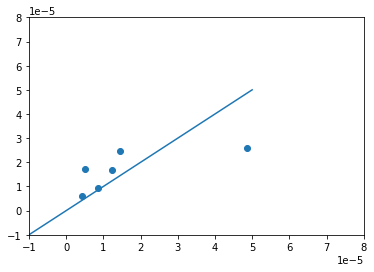

In [27]:
df["uperr"] = df.Prot_d_84 - df.Prot_d_50
df["lowerr"] = df.Prot_d_50 - df.Prot_d_16
#plt.errorbar(x=df.rel_amplitude_50, y=df.Prot_d_50, yerr=df[['uperr', 'lowerr']].values.T)
plt.scatter(df.uperr,df.lowerr)
plt.plot([-1e-5,5e-5],[-1e-5,5e-5])
plt.xlim(-1e-5,8e-5)
plt.ylim(-1e-5,8e-5)

In [28]:
result = pd.DataFrame({"ID":df.ID,
                        'Prot_d':df.Prot_d_50,
                       'e_Prot_d':(df.uperr + df.lowerr)/2})
result

,ID,Prot_d,e_Prot_d
0,44984200,0.112988,0.000011
1,44984200,0.112973,0.000009
2,44984200,0.112984,0.000005
3,237880881,0.351673,0.000020
4,237880881,0.351306,0.000037
5,277539431,0.190013,0.000014


In [34]:
resprop = pd.DataFrame(
[result.groupby("ID").Prot_d.mean(),
result.groupby("ID").e_Prot_d.apply(lambda x: np.sqrt((x**2).sum())/3)]
    ).T

In [36]:
resprop.to_csv(f"{CWD}/analysis/results/mcmc/rotation/mcmc_rotation_output_reduced_propagated.csv")